In [1]:
#!pip install biopython
#!pip install ablang
#!pip install umap-learn
import ablang

In [2]:
from Embedtest import OASDBDesc
import pandas as pd
#import umap.umap_ as umap
import seaborn as sns

2023-04-18 17:55:51 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.


In [3]:
#!ls ../Desktop/merck/

In [4]:
obj_oasdb = OASDBDesc()
df_seqs = obj_oasdb.read_data("../Desktop/merck/")

/Users/malavikha/EmbedTest/Embedtest.py:32: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(paired_file, compression = "gzip", sep = ",", skiprows=1)
/Users/malavikha/EmbedTest/Embedtest.py:32: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(paired_file, compression = "gzip", sep = ",", skiprows=1)
/Users/malavikha/EmbedTest/Embedtest.py:32: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(paired_file, compression = "gzip", sep = ",", skiprows=1)


In [5]:
df_seqs.shape

(1572406, 8)

In [6]:
df_vgene, df_heavy_len = obj_oasdb.perform_random_sample(df_seqs, 10, 500)

/Users/malavikha/EmbedTest/Embedtest.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["iter"]= i
/Users/malavikha/EmbedTest/Embedtest.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["iter"] = i
/Users/malavikha/EmbedTest/Embedtest.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [7]:
df_heavy_len

,VH_Len,iter
0,120,0
1,122,0
2,122,0
3,119,0
4,119,0
...,...,...
4995,127,9
4996,125,9
4997,124,9
4998,121,9


<AxesSubplot:xlabel='iter', ylabel='VH_Len'>

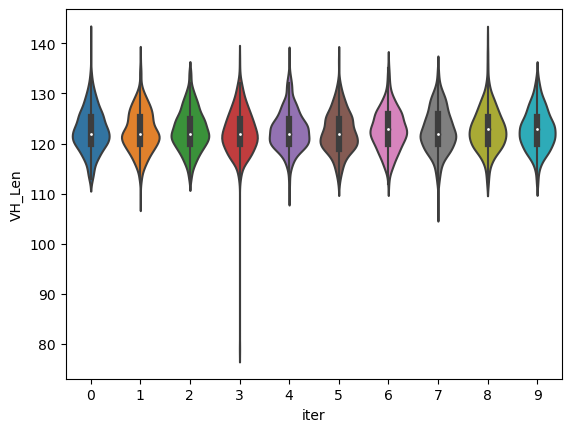

In [8]:
sns.violinplot(data=df_heavy_len, x='iter', y='VH_Len')

In [9]:
df_vgene[["v_call_heavy", "iter"]].value_counts().unstack().fillna(0.0).sort_values(0, ascending=False)

iter,0,1,2,3,4,5,6,7,8,9
v_call_heavy,,,,,,,,,,
IGHV3-23*01,39.0,43.0,38.0,33.0,48.0,46.0,34.0,36.0,33.0,46.0
IGHV4-39*01,27.0,28.0,24.0,27.0,29.0,21.0,25.0,26.0,21.0,30.0
IGHV4-59*01,21.0,22.0,24.0,12.0,22.0,16.0,22.0,21.0,20.0,24.0
IGHV1-69*01,16.0,18.0,6.0,14.0,12.0,7.0,5.0,13.0,14.0,6.0
IGHV3-30*18,14.0,11.0,12.0,9.0,10.0,3.0,12.0,11.0,14.0,10.0
...,...,...,...,...,...,...,...,...,...,...
IGHV2-70*17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
IGHV2-70*20,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
IGHV2-9-1*01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
df_sub_sample = df_seqs.sample(1500)

#annotating with v_call heavy
annot_col = 'v_call_heavy'
seq_name='sequence_alignment_aa_heavy'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'PC2')

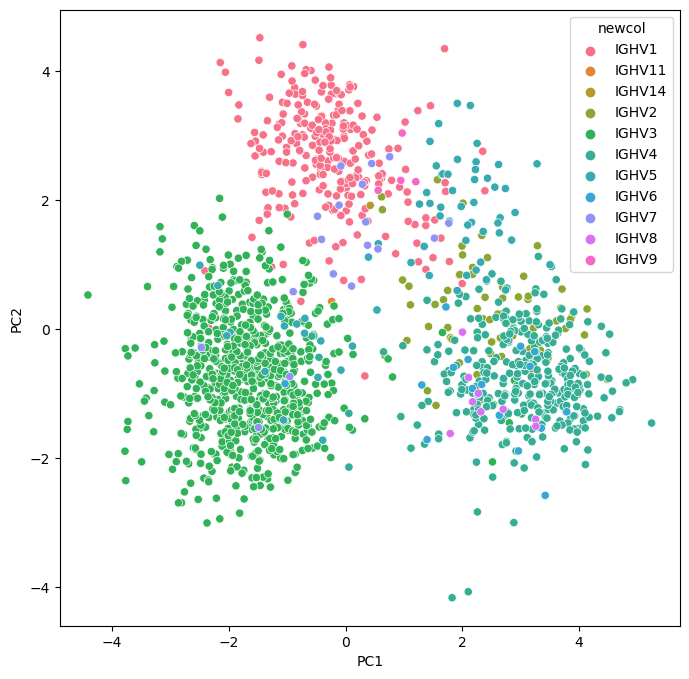

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

v_call_light

In [13]:
df_sub_sample = df_seqs.sample(1500)

#annotating with v_call light
annot_col = 'v_call_light'
seq_name='sequence_alignment_aa_light'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

Text(0, 0.5, 'PC2')

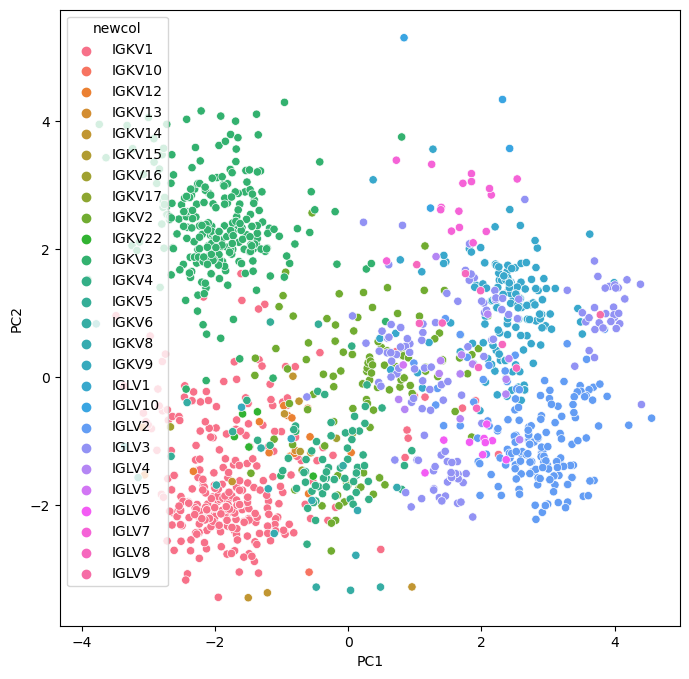

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

j_call_heavy

In [15]:
df_sub_sample = df_seqs.sample(1500)

#annotating with j_call heavy
annot_col = 'j_call_heavy'
seq_name='sequence_alignment_aa_heavy'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

Text(0, 0.5, 'PC2')

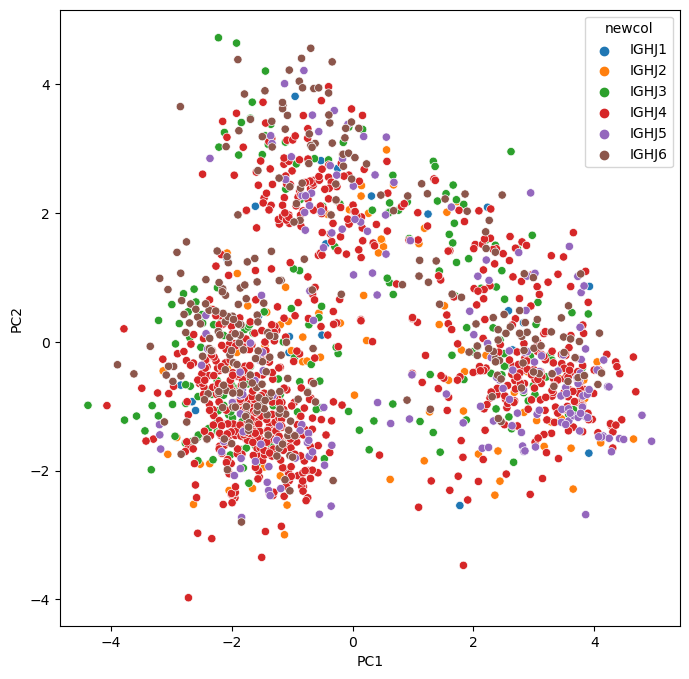

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

j_call_light

In [9]:
df_sub_sample = df_seqs.sample(1500)

#annotating with j_call light
annot_col = 'j_call_light'
seq_name='sequence_alignment_aa_light'
df_sub_sample.reset_index(inplace=True)

df_pc_en = obj_oasdb.pc_embedding(df_sub_sample[[seq_name, annot_col]], seq_name, annot_col)
df_pcs_meta = obj_oasdb.pca_analysis(df_pc_en, df_sub_sample[[annot_col]], annot_col)

Text(0, 0.5, 'PC2')

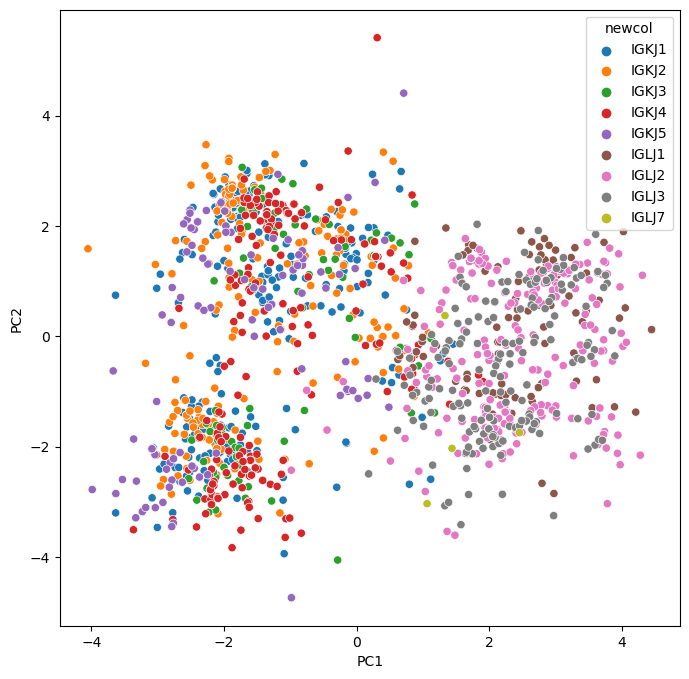

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_pcs_meta, x="PC1", y='PC2', cmap ='plasma', hue='newcol')

plt.xlabel('PC1')
plt.ylabel('PC2')

In [19]:
 #please try a sequence embedding with ablang embedding, perform dimensionality reduction, and annotate it with different genes?

In [20]:
#try with 10,000, 50,000 sequences if savio allows

**Ablang Embedding**

In [10]:
seqs_light, seqs_heavy = obj_oasdb.ablang_encode_seq(df_sub_sample)

In [17]:
print(seqs_light.shape)

(30, 768)


In [18]:
#plot this with t-sne and pca. each sequence has a vector of size 768. transform the vector into a df and 
#then use the pc_analysis function. matrix of visualisations incorporating ablang, physiochemical encoding

In [13]:
print(seqs_heavy)

[[-0.85268383 -0.37778234 -0.59328484 ... -1.1397413   0.03087787
   0.56672242]
 [-0.35795343  0.56760133 -0.94313508 ... -0.35242425  0.91577128
   1.22773012]
 [-0.5550812  -0.17336696 -0.54083686 ...  0.16313715  0.35330809
   0.57725184]
 ...
 [-0.83279241  0.31155199 -0.57166102 ...  0.31025749  0.46367542
   0.60653745]
 [-0.63234268  0.10297147 -0.20533384 ...  0.06095359  0.63350888
   0.50532562]
 [-0.54221733  0.33242887 -1.22014674 ... -0.72487336  0.85230929
   0.63245723]]


**t-SNE**

In [15]:
df_sub_sample

,index,v_call_heavy,j_call_heavy,v_call_light,j_call_light,sequence_alignment_aa_light,sequence_alignment_aa_heavy,ANARCI_status_light,ANARCI_status_heavy,VH_Len
0,310657,IGHV3-7*01,IGHJ4*02,IGKV4-1*01,IGKJ2*01,DIVMTQSPDSLAVSLGERATINCKSSQSVLYNSNKKNYLAWYQQKP...,EVHLVESGGGLVQPGGSPRLSCAASGFTFSDHCMSWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||",121
1,1076293,IGHV3-7*01,IGHJ3*02,IGKV1-39*01,IGKJ4*01,DIQMTQSPSSLSASIGDRVSISCRASQTIGTYLNWYQQKPGKAPKL...,EVQLVESGGGLVQPGGSLRLSCAAAGFRFENYWMSWVRQAPGKGLE...,|||||,"|Deletions: 10, 73||||",123
2,45830,IGHV4-61*02,IGHJ4*02,IGKV1-39*01,IGKJ2*01,DIQMTQSPSSLSASVGDRVTITCRASQTIISYLNWYQLSPGKAPKL...,QVRLQESGPGLVKPSQTLSLTCTVSGGSVSSGNYYWSWIRQPAGKG...,|||||,"|Deletions: 10, 73||||",121
3,1556481,IGHV1-46*01,IGHJ3*02,IGKV3-20*01,IGKJ3*01,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYYMHWVRQAPGQGLE...,|||||,"|Deletions: 10, 73||||",119
4,1280011,IGHV4-4*02,IGHJ4*02,IGKV1-5*03,IGKJ1*01,DIQMTQSPSTLSASVGDRVTITCRASQSISSWLAWYQQKPGKAPKL...,QVQLQESGPGLVKPSGTLSLTCAVSGGSISSSNWWSWIRQPPGKGL...,|||||,"|Deletions: 10, 73||||",117
...,...,...,...,...,...,...,...,...,...,...
1495,1290543,IGHV3-11*01,IGHJ4*02,IGKV1-33*01,IGKJ3*01,DTQMTQSPSSLSASVGDRVTITCQASQDIRNDLNWYEQKAGKAPKL...,QVQLVESGGGLVKPGGSLRLSCAASGFSFSAYYMSWVRQAPGKRLE...,|||||,"|Deletions: 10, 73||||",121
1496,1195761,IGHV4-34*01,IGHJ5*02,IGKV1-5*03,IGKJ1*01,DIQMTQSPSILSASVGDRVTIACRASQSISSWMAWYQQKPGKAPKL...,QVQLQQWGAGLLKPSETLSLTCGVYGGSFSDYYWSWIRQAPGKGLE...,|||||,"|Deletions: 10, 73||||",125
1497,178171,IGHV4-34*01,IGHJ4*02,IGKV1-8*01,IGKJ1*01,AIRMTQSPSSFSASTGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,|||||,"|Deletions: 10, 73||||",124
1498,168265,IGHV4-59*01,IGHJ4*02,IGKV1-33*01,IGKJ4*01,DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKL...,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...,|||||,"|Deletions: 10, 73||||",119


In [14]:
X_embedded = obj_oasdb.t_sne(df_sub_sample.loc[)

ValueError: could not convert string to float: 'IGHV3-7*01'

In [23]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c= np.arange(1500), s=5, cmap='Spectral')
plt.title('t-SNE projection of the dataset', fontsize=24);

NameError: name 'X_embedded' is not defined